## In this notebook, we'll explore the California Housing Prices dataset from the StatLib repository, wich contains data from the 1990 California census.

The dataset is available at the link: https://www.kaggle.com/datasets/camnugent/california-housing-prices?resource=download

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from pandas.plotting import scatter_matrix

In [6]:
# Get the data and take a look at it

housing = pd.read_csv("housing.csv")
print(housing.head())
print(housing.tail(20))
print(housing.info())
housing.describe()

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


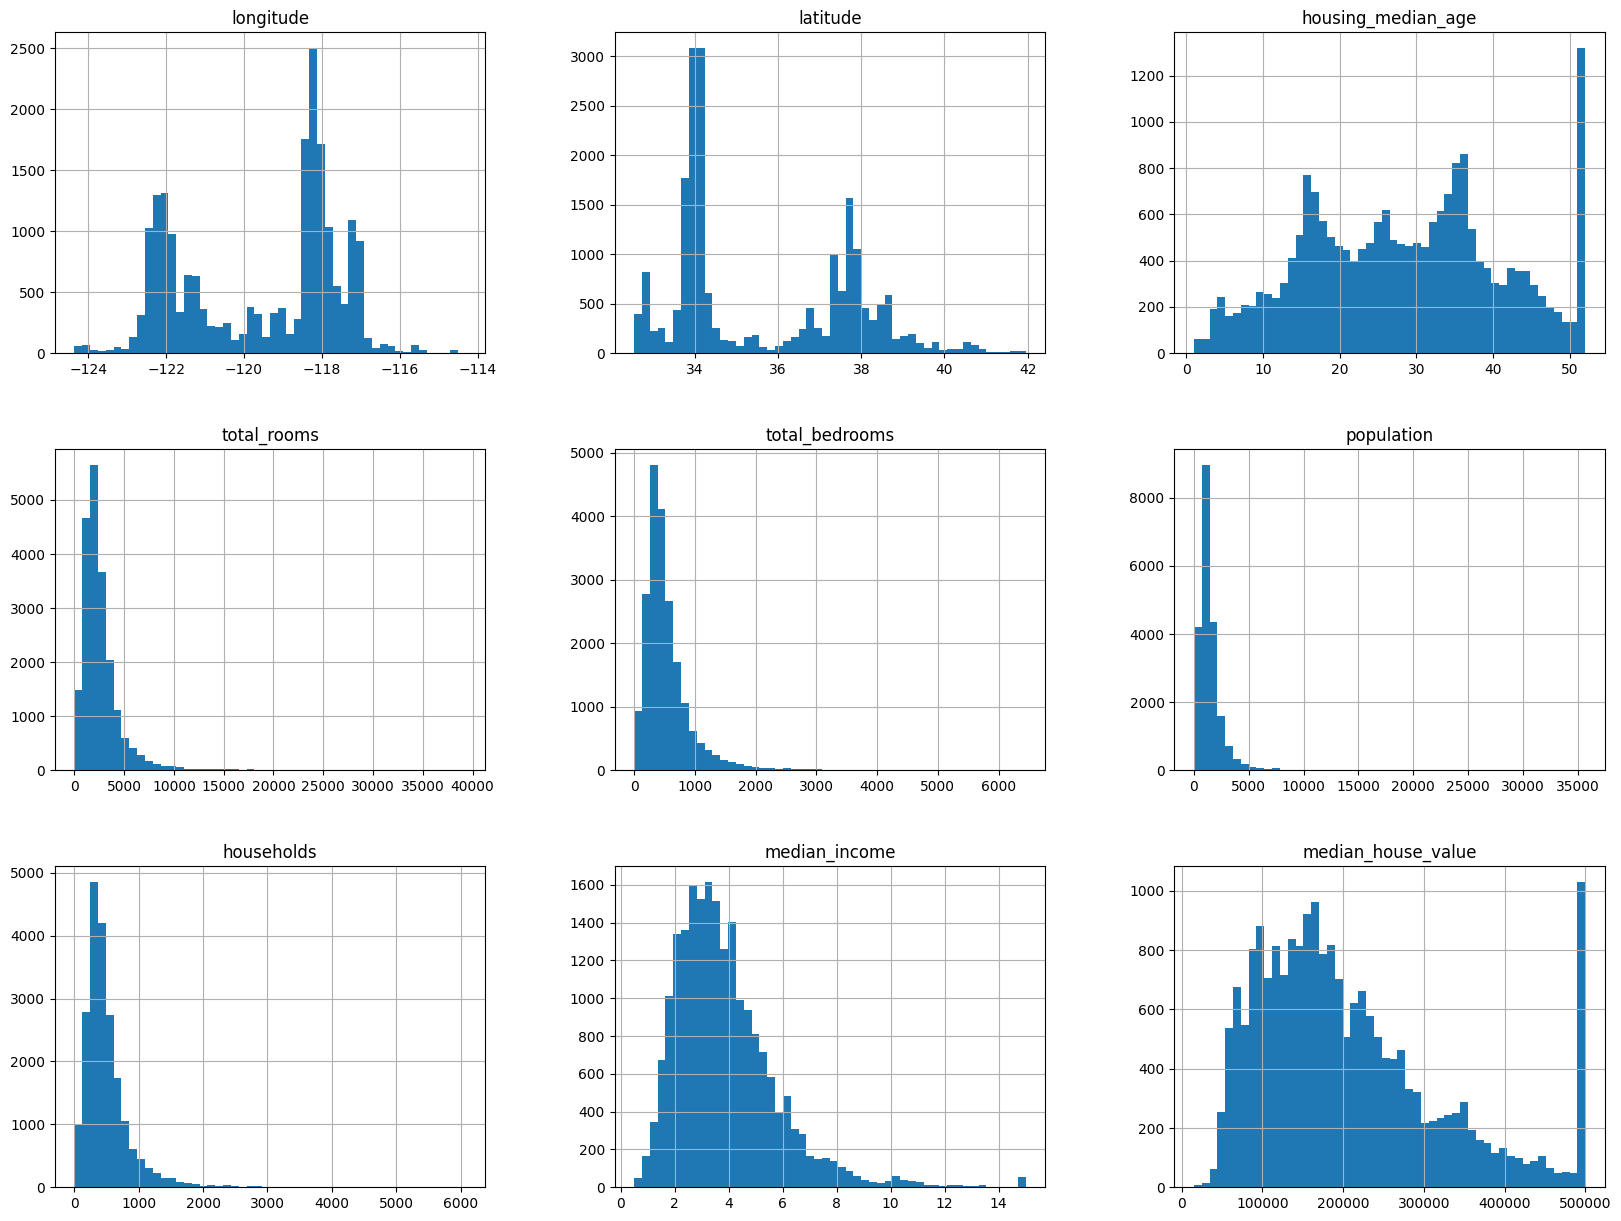

In [7]:
# Histograms

housing.hist(bins=50, figsize=(20,15))
plt.show()

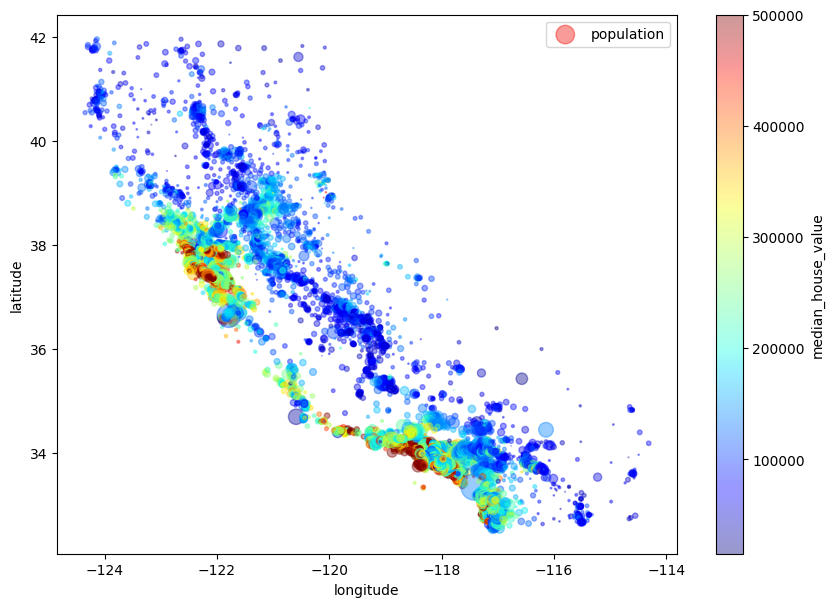

In [8]:
#It's cool to plot longitude against latitude because it resembles a real map of California.
housing.plot(kind="scatter", x="longitude", y="latitude", alpha = 0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True
            )
plt.legend()

![Alt Text](cali.png)

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

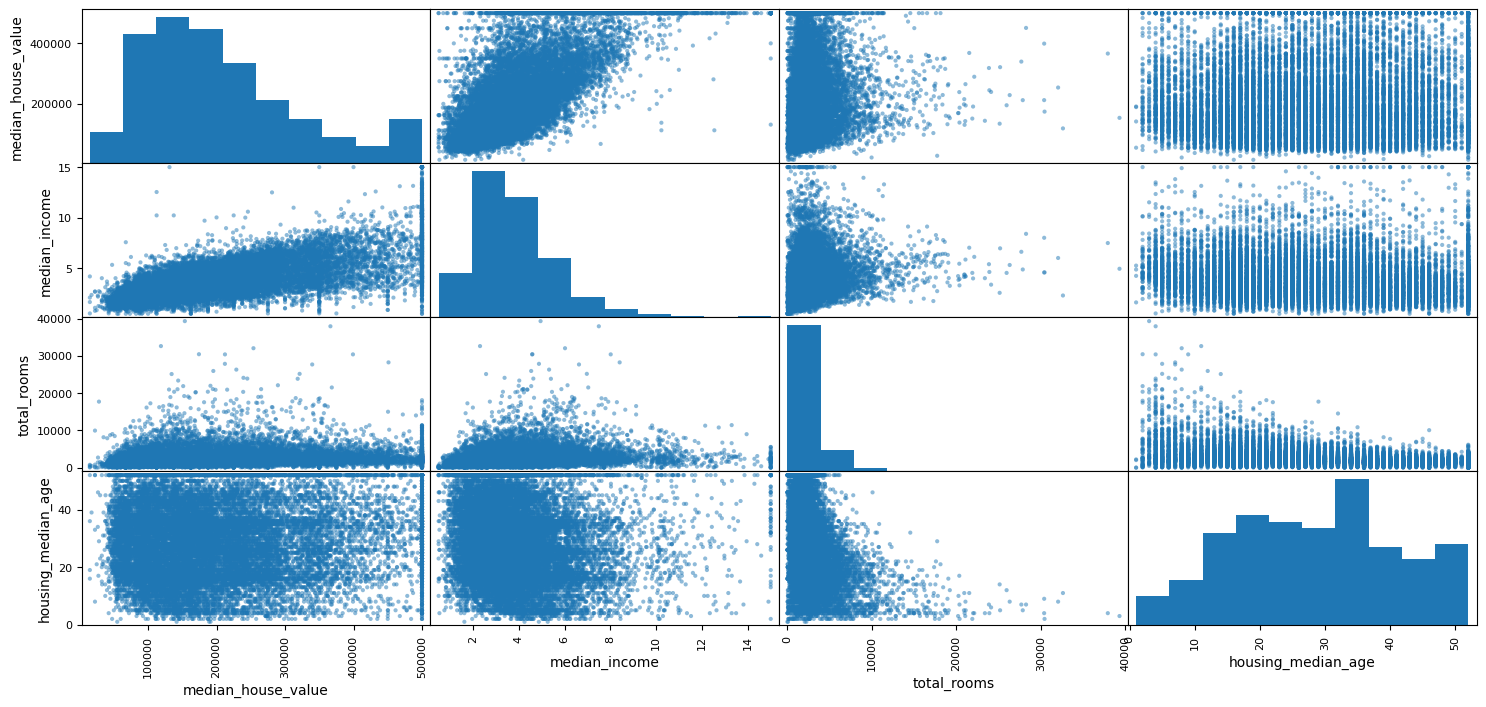

In [9]:
# Generate a scatter matrix for the specified attributes

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(18, 8)) 

In [10]:
# Create a new feature: average number of rooms per household
# - Calculated by dividing the total number of rooms by the total number of households
# - This provides insight into housing density or the average size of homes in the area
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]

# Create a new feature: proportion of bedrooms to total rooms
# - Calculated by dividing the total number of bedrooms by the total number of rooms
# - This helps understand how many rooms in a house are typically bedrooms, providing insights into housing patterns
housing["bedroom_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]

# Create a new feature: average number of people per household
# - Calculated by dividing the total population by the total number of households
# - This gives an idea of household density, or how crowded households are
housing["population_per_household"] = housing["population"] / housing["households"]


In [11]:
# Remove the non-numeric column "ocean_proximity" from the housing DataFrame
# - "ocean_proximity" is likely a categorical variable and cannot be used in correlation analysis
# - The resulting DataFrame, `housing_numeric`, contains only numeric columns
housing_numeric = housing.drop(["ocean_proximity"], axis=1)
corr_matrix = housing_numeric.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)


median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedroom_per_room           -0.255880
Name: median_house_value, dtype: float64

In [12]:
# Define features (X) and target (y)
X = housing_numeric.drop("median_house_value", axis=1)  # Features
y = housing_numeric["median_house_value"]  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output shapes for verification
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((16512, 11), (4128, 11), (16512,), (4128,))

In [13]:
# Fit a Decision Tree Regressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [14]:
# Predict on the training and test sets
y_train_pred = tree_reg.predict(X_train)
y_test_pred = tree_reg.predict(X_test)

In [16]:
train_metrics = {
    "MSE": mean_squared_error(y_train, y_train_pred),
    "RMSE": np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "MAE": mean_absolute_error(y_train, y_train_pred),
    "R²": r2_score(y_train, y_train_pred),
}
test_metrics = {
    "MSE": mean_squared_error(y_test, y_test_pred),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred)),
    "MAE": mean_absolute_error(y_test, y_test_pred),
    "R²": r2_score(y_test, y_test_pred),
}
evaluation_metrics = {
    "Train": train_metrics,
    "Test": test_metrics
}

# Display the organized metrics
evaluation_metrics

{'Train': {'MSE': np.float64(0.0),
  'RMSE': np.float64(0.0),
  'MAE': np.float64(0.0),
  'R²': 1.0},
 'Test': {'MSE': np.float64(4952550553.821464),
  'RMSE': np.float64(70374.36005976511),
  'MAE': np.float64(45599.654796511626),
  'R²': 0.6220606973809204}}

The perfect scores (MSE = 0, RMSE = 0, MAE = 0, R² = 1) on the training set indicate that the Decision Tree Regressor is perfectly memorizing the training data, which is characteristic of overfitting. 
Why this happens:
Decision Tree Complexity:

Decision trees tend to overfit the training data, especially when not constrained (e.g., by limiting maximum depth or minimum samples per leaf).
Without regularization, the tree keeps splitting until it perfectly fits the training data.
Indicators of Overfitting:

Perfect metrics on the training set.
Poor metrics (high error, negative R²) on the testing set.

To find the best parameters, let's use GridSearchCV

In [19]:
# Define a parameter grid for the Decision Tree Regressor
param_grid = {
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

In [20]:
# Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(
    estimator=tree_reg,
    param_grid=param_grid,
    scoring="neg_mean_squared_error",  # Negative MSE for regression
    cv=5,  # 5-fold cross-validation
    verbose=1,  # Print progress
    n_jobs=-1  # Use all available cores
)

In [21]:
# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error', verbose=1)

In [22]:
# Extract the best parameters and corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [23]:
# Evaluate the best model 
y_train_pred_best = best_model.predict(X_train)
y_test_pred_best = best_model.predict(X_test)


train_metrics_best = {
    "MSE": mean_squared_error(y_train, y_train_pred_best),
    "RMSE": np.sqrt(mean_squared_error(y_train, y_train_pred_best)),
    "MAE": mean_absolute_error(y_train, y_train_pred_best),
    "R²": r2_score(y_train, y_train_pred_best),
}


test_metrics_best = {
    "MSE": mean_squared_error(y_test, y_test_pred_best),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred_best)),
    "MAE": mean_absolute_error(y_test, y_test_pred_best),
    "R²": r2_score(y_test, y_test_pred_best),
}

In [24]:
evaluation_metrics_best = {
    "Train (Optimized)": train_metrics_best,
    "Test (Optimized)": test_metrics_best
}
evaluation_metrics_best

{'Train (Optimized)': {'MSE': np.float64(2351933156.1071997),
  'RMSE': np.float64(48496.73345811241),
  'MAE': np.float64(33066.8030699287),
  'R²': 0.8240595833052311},
 'Test (Optimized)': {'MSE': np.float64(3943485953.257065),
  'RMSE': np.float64(62797.18109323909),
  'MAE': np.float64(42747.0271327732),
  'R²': 0.6990644891222569}}

Training Set (Optimized)
    
    MSE (Mean Squared Error): 2,351,933,156
    The average squared difference between the predicted and actual house values is relatively low, indicating that the model is fitting the training data well.

    RMSE (Root Mean Squared Error): 48,496.73
    The average prediction error is approximately $48,497, which is in the same unit as the target variable (median_house_value).

    MAE (Mean Absolute Error): 33,066.80
    On average, the predictions deviate from the actual values by about $33,067, indicating a decent accuracy level.

    R² (R-squared): 0.824
    The model explains about 82.4% of the variance in the training data, which is strong and suggests a good fit.

Testing Set (Optimized)

    MSE (Mean Squared Error): 3,943,485,953
    The average squared difference between predicted and actual values is higher than for the training set, indicating some generalization error.

    RMSE (Root Mean Squared Error): 62,797.18
    The average prediction error is approximately $62,797, slightly higher than for the training set.

    MAE (Mean Absolute Error): 42,747.03
    On average, the predictions deviate from the actual values by about $42,747, showing reasonable performance but less accurate than the training set.

    R² (R-squared): 0.699
    The model explains 69.9% of the variance in the testing data, which is lower than for the training set but still good. This drop in performance indicates some degree of overfitting.

Observations
Performance Gap:
The training metrics are better than the testing metrics, showing that the model performs slightly better on the training data (possible mild overfitting).
R² Comparison:
The R² values of 82.4% (training) and 69.9% (testing) are indicative of a model that generalizes reasonably well but could still be improved.
Actionable Steps:
Further tuning the hyperparameters.
Trying more robust ensemble models like Random Forests or Gradient Boosting for potentially better generalization.